# Clustering
Clustering is a process of grouping similar items together. Each group, also called as a cluster, contains items that are similar to each other. Clustering algorithms are unsupervised learning algorithms i.e. we do not need to have labelled datasets.

In this post we’ll classify news articles into different categories. First download the dataset from http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip and extract. The dataset consists of 2225 documents and 5 categories: business, entertainment, politics, sport, and tech. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_files

# for reproducibility
random_state = 0 

DATA_DIR = "./bbc/"
data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace", random_state=random_state)
df = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])
df.head()

,text,label
0,Tate & Lyle boss bags top award\n\nTate & Lyle...,0
1,Halo 2 sells five million copies\n\nMicrosoft ...,4
2,MSPs hear renewed climate warning\n\nClimate c...,2
3,Pavey focuses on indoor success\n\nJo Pavey wi...,3
4,Tories reject rethink on axed MP\n\nSacked MP ...,2


In [19]:
# vectorize texts with tf-idf values
# feel free to explore different settings of TfidfVectorizer
vec = TfidfVectorizer(stop_words="english")
vectors = vec.fit_transform(df.text.values)

## Model training
Let’s create an instance of KMeans. We’ll choose 5 as the number of clusters since the dataset contains articles that belong to one of 5 categories. In applications when you do not have labels then you won’t exactly know how many clusters to create, so you have to find the best one that fits your needs via running multiple experiements and using domain knowledge to guide you.

In [25]:
from sklearn.cluster import KMeans
cls = KMeans(n_clusters=5)
cls.fit_predict(vectors)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([4, 1, 4, ..., 2, 2, 3], dtype=int32)

## Visualization
To visualize, we’ll plot the features in a 2D space. As we know the dimension of features that we obtained from TfIdfVectorizer is quite large, we need to reduce the dimension before we can plot. For this, we’ll ues PCA to transform our high dimensional features into 2 dimensions.

In [26]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

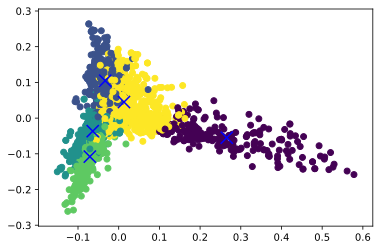

In [27]:
%config InlineBackend.figure_format = 'svg'

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

## Evaluation
We will use the categories provided by the dataset as our ground truth labels, and measure the clustering performance by the external evaluation methods introduced in our lecture: purity and rand index. 

In [28]:
# purity
from sklearn.metrics import homogeneity_score
homogeneity_score(df.label, cls.predict(features))

0.6926535346268713

In [29]:
# rand index
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(df.label, cls.predict(features))

0.6429306919681147

## Exercises
* Try different tf-idf settings and see which setting yields the best evaluation metrics
* Run k-means for mulitple rounds to see how different initial seeds influence the performance
* Write a function to try multiple (e.g., 10) initial seeds and find the best resulting clustering
* Use [mean-shifting](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html) and [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) to perform the clustering, see how many clusters they create, visulize their clusters and measure their performance by purity and rand index. 